# National Taiwan University 國立臺灣大學

# YANG YU HSIANG 楊宇翔

# spatial lag, and spatial error model
* 當傳統迴歸的誤差有空間自相關時，表示它不是i.i.d. 有空間的屬性，此時有兩種常的做法：
* 空間落遲模型 Spatial Lag Model
 * 增加一個自變數，wy 鄰居的表現，代表鄰近效應，此時誤差的空間自相關程度可能會降低。

* 空間誤差模型 Spatial Error Model
 * 誤差以 we 解釋，此時新的誤差會更接近空間隨機。代表有一個具空間特性的隱藏的變數存在，當它被控制時，誤差更接近 i.i.d.


# 安裝 geopandas

In [ ]:
! pip install geopandas

In [ ]:
! pip install libpysal
# http://pysal.org/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.9 MB/s eta 0:00:00


In [ ]:
! pip install spreg
# https://pysal.org/spreg/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
# 繪圖的補充包
! pip uninstall rtree
! sudo apt install libspatialindex-dev
! pip install rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 0s (1,464 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78,

In [ ]:
# 安裝 mapclassify
! pip install mapclassify

In [ ]:
! pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
! pip install spreg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
import libpysal as lps
import numpy as np
import libpysal
from sklearn.linear_model import LinearRegression
from spreg import ML_Error_Regimes
from shapely.geometry import Point
import geopandas as gpd
from spreg import ML_Lag, OLS, ML_Error,ML_Lag_Regimes, OLS_Regimes, ML_Error_Regimes
import seaborn as sns
import esda

In [ ]:
# from matplotlib import rcParams
# rcParams["font.sans-serif"] = ["kaiu"]
# rcParams["font.family"] ="DFKai-sb"

In [ ]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-06-28 05:55:46--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.134.139, 74.125.134.101, 74.125.134.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-06-28 05:55:46--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  65.1MB/s    in 0.3s    

2024-06-28 05:55:

# 與 google drive 連線

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 設定 path

In [ ]:
path="/content/drive/MyDrive/"      # 分享資料讀取
pth="/content/drive/MyDrive/"

In [ ]:
#os.chdir(path)
#import covid

### read 直接讀取

In [ ]:
#gdf.plot()

NameError: name 'gdf' is not defined

<Axes: >

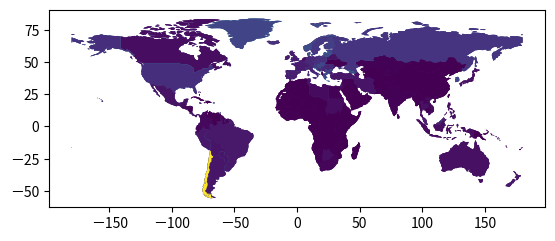

In [ ]:
############################################
fname="shape/covid_data_202203.shp"
gdf = gpd.read_file(pth+fname)
# 數字欄位 astype(float)
col=gdf.columns
for c in col:
  try:
    gdf[c]=gdf[c].astype(float)
  except:
    pass
gdf.plot('death_incp')

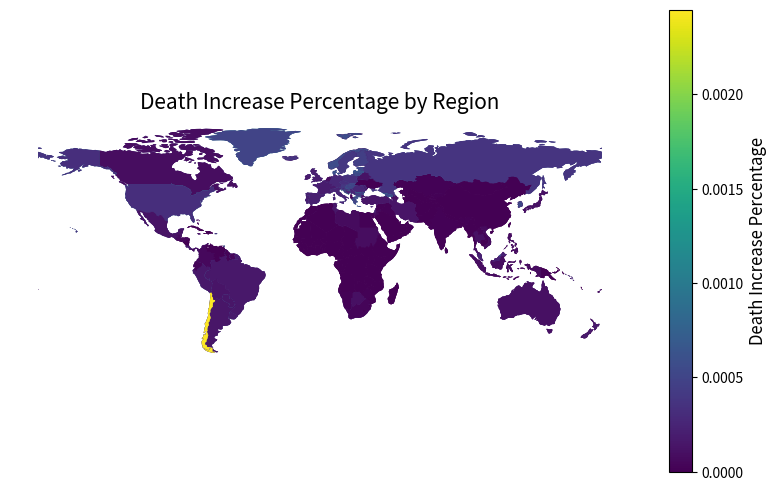

In [22]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame
fname="shape/covid_data_202203.shp"
gdf = gpd.read_file(pth+fname)


# 數字欄位 astype(float)
col = gdf.columns  # 1. Assign column names to variable `col`
for c in col:      # 2. Iterate over each column name in `col`
    try:
        gdf[c] = gdf[c].astype(float)  # 3. Attempt to convert the current column to float type
    except:
        pass  # 4. Handle exceptions by passing to the next iteration if conversion fails

# Plot the `death_incp` column with a legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='death_incp', ax=ax, legend=True, cmap='viridis')

# Customize the legend
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Death Increase Percentage', size=12)
cbar.yaxis.label.set_size(12)
cbar.tick_params(labelsize=10)

# Set title and labels for the plot
ax.set_title('Death Increase Percentage by Region', fontsize=15)
ax.set_axis_off()

plt.show()



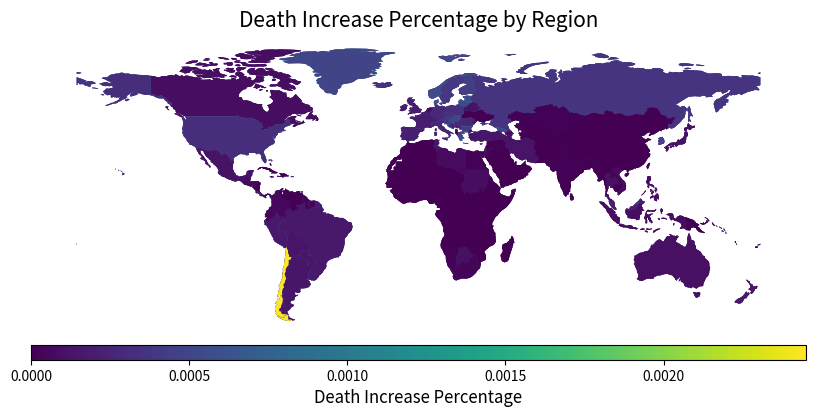

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 數字欄位 astype(float)
col = gdf.columns  # 1. Assign column names to variable `col`
for c in col:      # 2. Iterate over each column name in `col`
    try:
        gdf[c] = gdf[c].astype(float)  # 3. Attempt to convert the current column to float type
    except:
        pass  # 4. Handle exceptions by passing to the next iteration if conversion fails

# Plot the `death_incp` column with a legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the data
gdf.plot(column='death_incp', ax=ax, legend=False, cmap='viridis')

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
# Append axes to the right of ax, with 5% width of ax
cax = divider.append_axes("bottom", size="5%", pad=0.1)

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf['death_incp'].min(), vmax=gdf['death_incp'].max()))
sm._A = []  # Empty array for the data range
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')

# Customize the colorbar
cbar.set_label('Death Increase Percentage', size=12)
cbar.ax.tick_params(labelsize=10)

# Set title and labels for the plot
ax.set_title('Death Increase Percentage by Region', fontsize=15)
ax.set_axis_off()

plt.show()


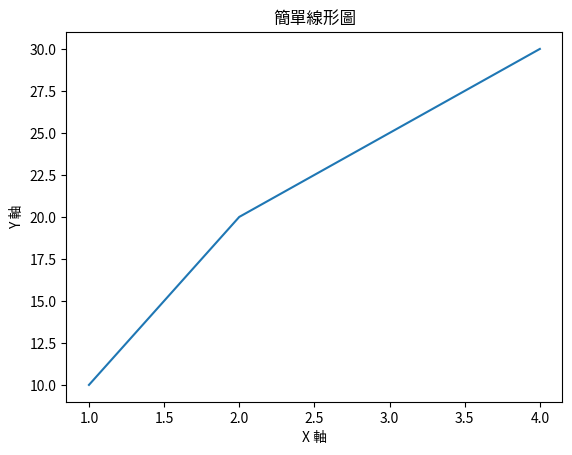

In [24]:
import matplotlib.pyplot as plt

# 創建 figure 和 axes
fig, ax = plt.subplots()

# 在 axes 上繪圖
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# 設置標題和標籤
ax.set_title('簡單線形圖')
ax.set_xlabel('X 軸')
ax.set_ylabel('Y 軸')

# 顯示圖形
plt.show()


In [26]:
gdf.columns

Index(['iso_a3', 'Country', 'C1_combine', 'C2_combine', 'C3_combine',
       'C4_combine', 'C5_combine', 'C6_combine', 'C7_combine', 'C8_combine',
       'E1_combine', 'E2_combine', 'H1_combine', 'H2_combine', 'H3_combine',
       'H6_combine', 'H7_combine', 'H8_combine', 'V1_combine', 'V2_combine',
       'V3_combine', 'V4_combine', 'Cases', 'Deaths', 'Stringency', 'Govern',
       'Contain', 'Eco_Sup', 'area', 'cate', 'demo', 'eco_dev', 'edu', 'ferti',
       'gdp_c', 'life', 'popu', 'region', 'region2', 'delibdem', 'egaldem',
       'libdem', 'partipdem', 'death_p', 'case_p', 'case_incp', 'death_incp',
       'ym', 'continent', 'geometry'],
      dtype='object')

## 主題圖

In [28]:
def plot_poly_map(gdf,variable, title, scheme='QUANTILES', k=10, color='OrRd', edgecolor='gray', linewidth=1,figsize=(20, 10), missing=False, fmt=0):
    fmt=["{:.1e}","{:.1f}","{:.2f}","{:.3f}","{:.4f}"][fmt]
    if missing==False:
        gdf.plot(column=variable,figsize=figsize,scheme=scheme, k=k, edgecolor=edgecolor,linewidth=linewidth, \
                    cmap=color, legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt':fmt})
    if missing==True:
        gdf.plot(column=variable,figsize=figsize,scheme=scheme, k=k, edgecolor=edgecolor, linewidth=linewidth,
                    cmap=color, legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt':fmt},
                    missing_kwds={'color': 'lightgrey', "edgecolor": "gray", "hatch": "///","label": "Missing values"})
    plt.savefig(pth+title+".png")
    plt.show()

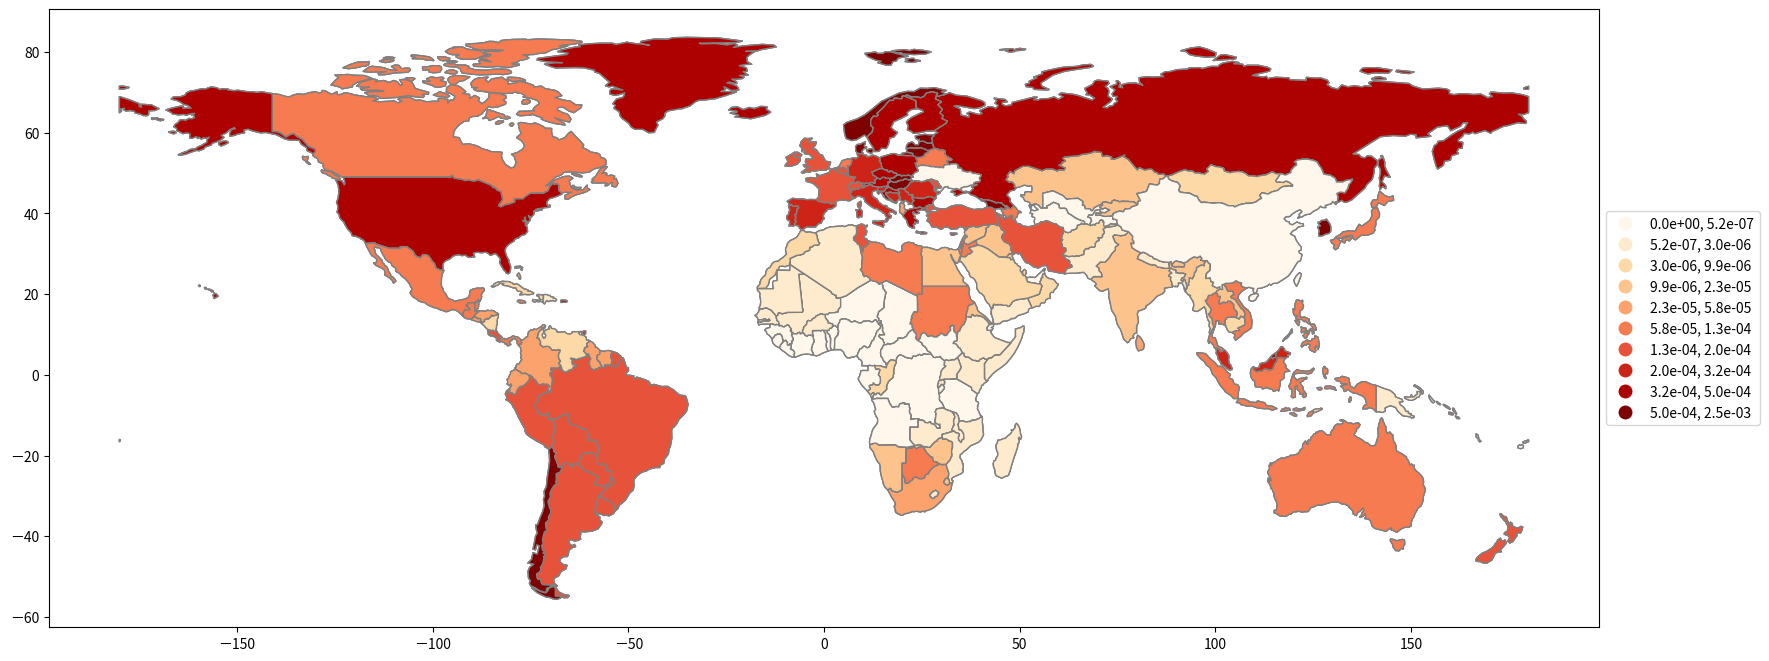

In [29]:
#######################
variable='death_incp'
title=variable+'2022'
#######################
plot_poly_map(gdf, variable, title)

## heatmap 相關矩陣

In [33]:
def coorelation_matrix(df_corr, title):
    sns.set(rc={'figure.figsize':(24,12)})
    # 計算相關矩陣會跳過文字欄位
    sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
    plt.savefig(pth+title+".png")

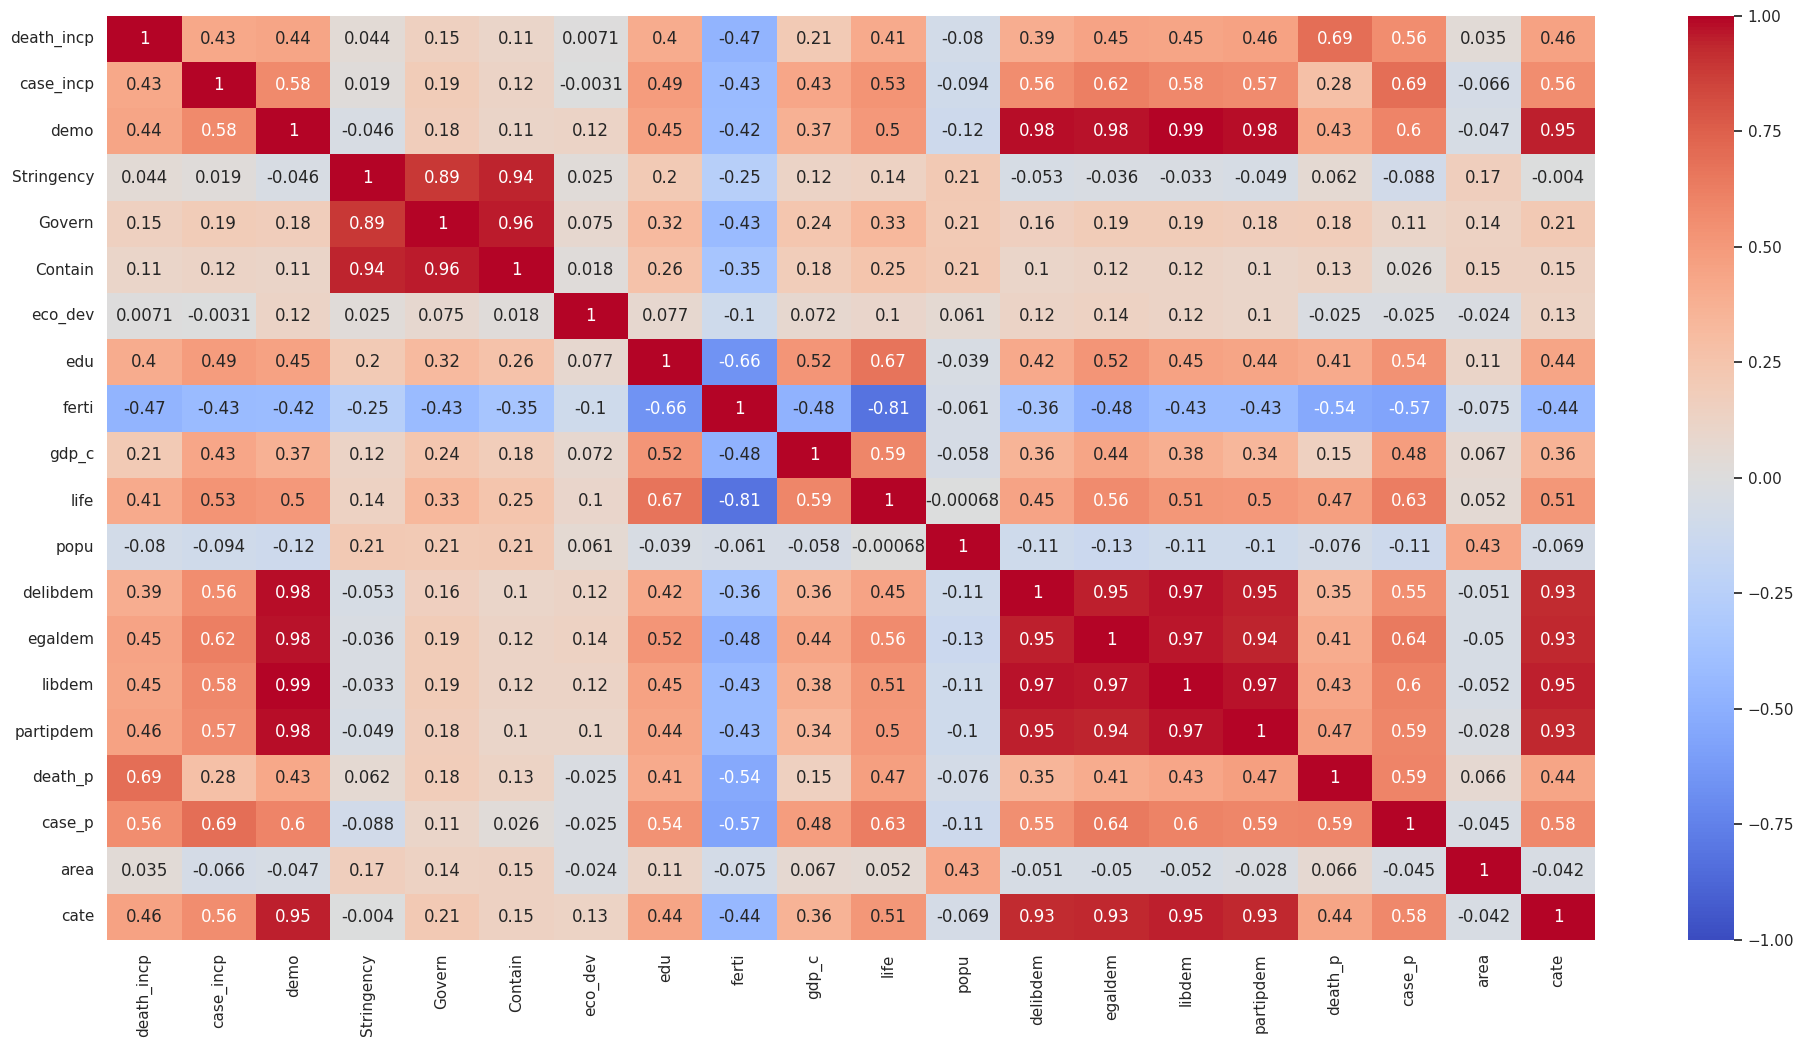

In [34]:
df_corr = gdf[[ 'death_incp', 'case_incp', 'demo','Stringency',
       'Govern', 'Contain',
       'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu',
       'delibdem', 'egaldem',
       'libdem', 'partipdem',
       'death_p', 'case_p','area', 'cate']]

title='covid_coorelation_matrix'
coorelation_matrix(df_corr, title)

# 資料整理

## 調整依變數的尺度

In [35]:
gdf['death_incp']=gdf['death_incp']*1000

## 虛擬變數

In [36]:
gdf['Europe']=gdf.continent.apply(lambda x:1 if x=='Europe' else 0)
gdf['Asia']=gdf.continent.apply(lambda x:1 if x=='Asia' else 0)
gdf['Africa']=gdf.continent.apply(lambda x:1 if x=='Africa' else 0)
gdf['North America']=gdf.continent.apply(lambda x:1 if x=='North America' else 0)
gdf['South America']=gdf.continent.apply(lambda x:1 if x=='South America' else 0)
gdf['Caribbean']=gdf.continent.apply(lambda x:1 if x=='Caribbean' else 0)
gdf['Oceania']=gdf.continent.apply(lambda x:1 if x=='Oceania' else 0)

## 交互作用項

In [37]:
## 交互作用項
gdf['demo_gdp']=gdf['gdp_c']*gdf['demo']

In [38]:
## 交互作用項
gdf['demo_Europe']=gdf['demo']*gdf['Europe']


In [39]:
gdf

,iso_a3,Country,C1_combine,C2_combine,C3_combine,C4_combine,C5_combine,C6_combine,C7_combine,C8_combine,...,geometry,Europe,Asia,Africa,North America,South America,Caribbean,Oceania,demo_gdp,demo_Europe
0,FJI,Fiji,2.741935,3.000000,2.00000,3.000000,1.290323,2.000000,2.000000,3.000000,...,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0,0,0,0,0,0,1,11840.155480,0.0
1,FJI,Fiji,0.928571,3.000000,2.00000,0.642857,1.392857,0.428571,2.000000,3.000000,...,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0,0,0,0,0,0,1,11840.155480,0.0
2,FJI,Fiji,0.000000,2.419355,2.00000,0.000000,1.500000,0.000000,2.000000,3.000000,...,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0,0,0,0,0,0,1,11840.155480,0.0
3,TZA,Tanzania,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,...,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0,0,1,0,0,0,0,940.686912,0.0
4,TZA,Tanzania,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.714286,...,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0,0,1,0,0,0,0,940.686912,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,TTO,Trinidad and Tobago,2.000000,2.000000,2.00000,3.285714,0.000000,0.000000,0.000000,4.000000,...,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0,0,0,0,1,0,0,18134.585232,0.0
485,TTO,Trinidad and Tobago,2.000000,2.000000,2.00000,3.193548,0.000000,0.000000,0.000000,4.000000,...,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0,0,0,0,1,0,0,18134.585232,0.0
486,SSD,South Sudan,0.935484,0.612903,0.16129,0.258065,0.903226,2.000000,0.516129,1.903226,...,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",0,0,1,0,0,0,0,1248.572208,0.0
487,SSD,South Sudan,1.000000,0.000000,1.00000,0.000000,0.000000,2.000000,1.000000,1.000000,...,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",0,0,1,0,0,0,0,1248.572208,0.0


# OLS 最小平方法迴歸

In [40]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency','Africa','Asia','Europe','North America','demo_gdp','demo_Europe']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :          11
S.D. dependent var  :      0.2531                Degrees of Freedom    :         478
R-squared           :      0.4076
Adjusted R-squared  :      0.3952
Sum squared residual:     18.5221                F-statistic           :     32.8820
Sigma-square        :       0.039                Prob(F-statistic)     :   1.847e-48
S.E. of regression  :       0.197                Log likelihood        :     106.484
Sigma-square ML     :       0.038                Akaike info criterion :    -190.968
S.E of regression ML:      0.1946                Schwarz criterion     :    -144.852

------------------------------------------------------------

## 誤差的 moran's I 檢定

In [41]:
gdf['error']=ols.u

In [42]:
# queen 鄰近矩陣
w_queen =  lps.weights.Queen.from_dataframe(gdf)
w_queen.transform = 'r'

<ipython-input-42-c4c60352b098>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen =  lps.weights.Queen.from_dataframe(gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


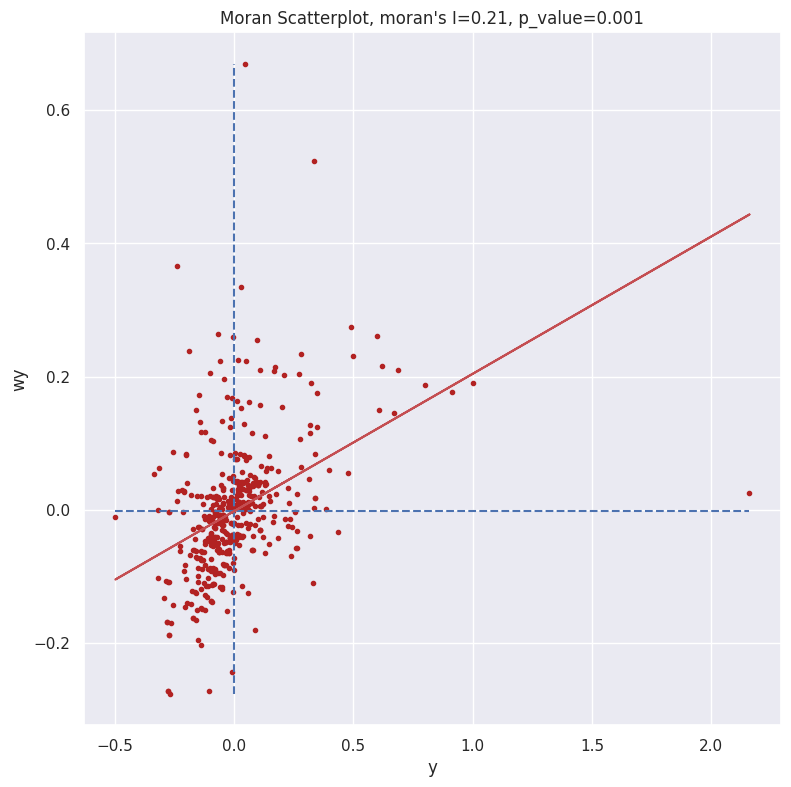

In [44]:
############
w=w_queen
y=gdf['error']
title='covid19_morans_I'
############
wy = lps.weights.lag_spatial(w, y)
# 係數與斜率
b, a = np.polyfit(y, wy, 1)
f, ax = plt.subplots(1, figsize=(9, 9))
# 散佈圖
plt.plot(y, wy, '.', color='firebrick')
# 縱軸
plt.vlines(y.mean(), wy.min(), wy.max(), linestyle='--')
 # 橫軸
plt.hlines(wy.mean(), y.min(), y.max(), linestyle='--')
# 趨勢線
plt.plot(y, a + b*y, 'r')
np.random.seed(12345)
# moran's I
moran=round(esda.moran.Moran(y, w).I,2)
# p_value
p_value=round(esda.moran.Moran(y, w).p_sim, 4)
# title
plt.title("Moran Scatterplot, moran's I="+ str(moran)+', p_value='+ str(p_value))
plt.ylabel('wy')
plt.xlabel('y')
plt.savefig(pth+title+".png")
plt.show()

# Spatial lag model

In [45]:
# queen 鄰近矩陣
w_queen =  lps.weights.Queen.from_dataframe(gdf)
w_queen.transform = 'r'

<ipython-input-45-c4c60352b098>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen =  lps.weights.Queen.from_dataframe(gdf)


In [46]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency','Africa','Asia','Europe','North America','demo_gdp','demo_Europe']
w = w_queen
w_name = "queen"
title='death_incp_slm'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
x = []
for i in ind:
    x.append(np.array(gdf[i]))
x = np.array(x).T
# 迴歸建模 slm
mllag = ML_Lag(y,x,w,name_y=dep,name_x=ind,name_w=w_name,name_ds=title, vm=True)
print(mllag.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :death_incp_slm
Weights matrix      :       queen
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :          12
S.D. dependent var  :      0.2531                Degrees of Freedom    :         477
Pseudo R-squared    :      0.4905
Spatial Pseudo R-squared:  0.4027
Log likelihood      :    134.1168
Sigma-square ML     :      0.0326                Akaike info criterion :    -244.234
S.E of regression   :      0.1807                Schwarz criterion     :    -193.925

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------------

## 誤差的 moran's I 檢定

In [47]:
gdf['error']=mllag.u

In [48]:
# queen 鄰近矩陣
w_queen =  lps.weights.Queen.from_dataframe(gdf)
w_queen.transform = 'r'

<ipython-input-48-c4c60352b098>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen =  lps.weights.Queen.from_dataframe(gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


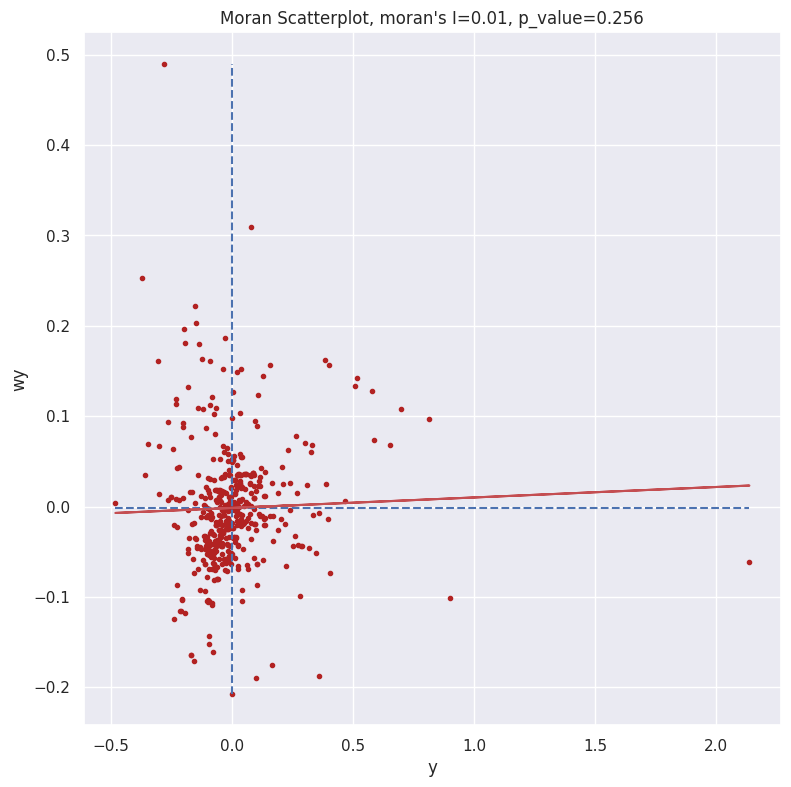

In [50]:
############
w=w_queen
y=gdf['error']
title='covid19_morans_I'
############
wy = lps.weights.lag_spatial(w, y)
# 係數與斜率
b, a = np.polyfit(y, wy, 1)
f, ax = plt.subplots(1, figsize=(9, 9))
# 散佈圖
plt.plot(y, wy, '.', color='firebrick')
# 縱軸
plt.vlines(y.mean(), wy.min(), wy.max(), linestyle='--')
 # 橫軸
plt.hlines(wy.mean(), y.min(), y.max(), linestyle='--')
# 趨勢線
plt.plot(y, a + b*y, 'r')
np.random.seed(12345)
# moran's I
moran=round(esda.moran.Moran(y, w).I,2)
# p_value
p_value=round(esda.moran.Moran(y, w).p_sim, 4)
# title
plt.title("Moran Scatterplot, moran's I="+ str(moran)+', p_value='+ str(p_value))
plt.ylabel('wy')
plt.xlabel('y')
plt.savefig(pth+title+".png")
plt.show()

# spatial error model

In [51]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency','Africa','Asia','Europe','North America','demo_gdp','demo_Europe']
w = w_queen
w_name = "queen"
title='death_incp_error'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
x = np.array([gdf[i] for i in ind]).T
# 迴歸建模
mlerr = ML_Error(y,x,w,name_y=dep,name_x=ind,name_w=w_name,name_ds=title)
print (mlerr.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :death_incp_error
Weights matrix      :       queen
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :          11
S.D. dependent var  :      0.2531                Degrees of Freedom    :         478
Pseudo R-squared    :      0.3943
Log likelihood      :    136.8627
Sigma-square ML     :      0.0319                Akaike info criterion :    -251.725
S.E of regression   :      0.1787                Schwarz criterion     :    -205.609

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        -0.04338

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


In [52]:
len(gdf)

489

## 誤差的 moran's I 檢定

In [53]:
gdf['error']=mlerr.u

In [54]:
# queen 鄰近矩陣
w_queen =  lps.weights.Queen.from_dataframe(gdf)
w_queen.transform = 'r'

<ipython-input-54-c4c60352b098>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen =  lps.weights.Queen.from_dataframe(gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


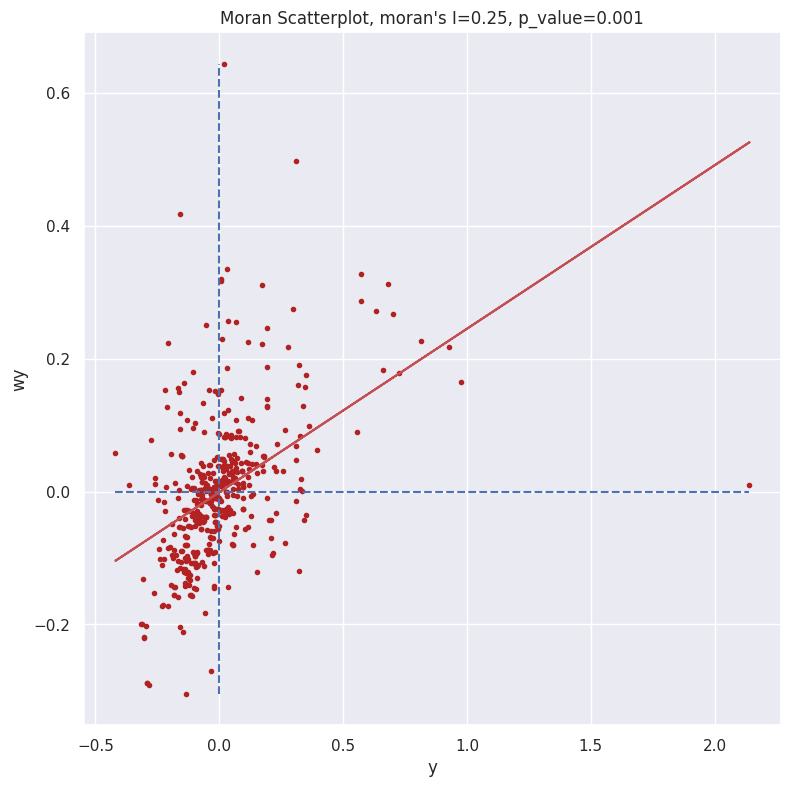

In [56]:
############
w=w_queen
y=gdf['error']
title='covid19_morans_I'
############
wy = lps.weights.lag_spatial(w, y)
# 係數與斜率
b, a = np.polyfit(y, wy, 1)
f, ax = plt.subplots(1, figsize=(9, 9))
# 散佈圖
plt.plot(y, wy, '.', color='firebrick')
# 縱軸
plt.vlines(y.mean(), wy.min(), wy.max(), linestyle='--')
 # 橫軸
plt.hlines(wy.mean(), y.min(), y.max(), linestyle='--')
# 趨勢線
plt.plot(y, a + b*y, 'r')
np.random.seed(12345)
# moran's I
moran=round(esda.moran.Moran(y, w).I,2)
# p_value
p_value=round(esda.moran.Moran(y, w).p_sim, 4)
# title
plt.title("Moran Scatterplot, moran's I="+ str(moran)+', p_value='+ str(p_value))
plt.ylabel('wy')
plt.xlabel('y')
plt.savefig(pth+ title+".png")
plt.show()